# KoELECTRA 감정 분류 분석

## 개요
- **분석 방법**: 딥러닝 기반 (KoELECTRA Fine-tuned Model)
- **분석 대상**: 유튜브 연애 클립 댓글
- **감정 분류**: 7가지 감정 (기쁨, 슬픔, 분노, 공포, 놀람, 혐오, 중립)

## 데이터 소스
- 댓글 레벨: `output/results/bert_based_classifier/comments_with_koelectra_emotion.csv`
- 동영상 요약: `output/results/bert_based_classifier/video_summary_koelectra.csv`
- 프로그램 요약: `output/results/bert_based_classifier/program_summary_koelectra.csv`
- 전체 요약: `output/results/bert_based_classifier/overall_summary_koelectra.json`

✓ 라이브러리 로드 완료
✓ font.family      : ['sans-serif']
✓ font.sans-serif  : ['Nanum Gothic', 'NanumGothic', 'AppleGothic']


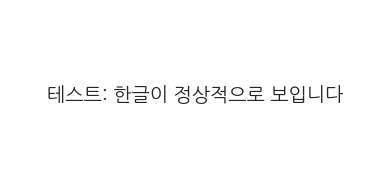

In [1]:
# =========================
# Visualization Environment Setup
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import json
from pathlib import Path

# -------------------------
# Seaborn style (FIRST)
# -------------------------
sns.set_style('whitegrid')
sns.set_palette('husl')

# -------------------------
# Font (Korean-safe, seaborn-compatible)
# -------------------------
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': [
        'Nanum Gothic',
        'NanumGothic',
        'AppleGothic',
        'Malgun Gothic',
        'DejaVu Sans'
    ],
    'axes.unicode_minus': False
})

# -------------------------
# Figure defaults
# -------------------------
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'figure.dpi': 100,
    'savefig.dpi': 300
})

# -------------------------
# Global color scheme
# -------------------------
SENTIMENT_COLORS = {
    'positive': '#4CAF50',  # green
    'negative': '#F44336',  # red
    'neutral':  '#9E9E9E'   # gray
}

EMOTION_COLORS = {
    'happy': '#FFD700',       # 금색 (기쁨)
    'sad': '#4169E1',         # 파랑 (슬픔)
    'angry': '#DC143C',       # 빨강 (분노)
    'anxious': '#8B008B',     # 보라 (불안)
    'embarrassed': '#FF8C00', # 오렌지 (당황)
    'heartache': '#2F4F4F'    # 진한 회색 (마음아픔)
}

print("✓ 라이브러리 로드 완료")
print(f"✓ font.family      : {plt.rcParams['font.family']}")
print(f"✓ font.sans-serif  : {plt.rcParams['font.sans-serif'][:3]}")

# -------------------------
# Font sanity check
# -------------------------
fig, ax = plt.subplots(figsize=(4, 2))
ax.text(
    0.5, 0.5,
    '테스트: 한글이 정상적으로 보입니다',
    ha='center', va='center', fontsize=14
)
ax.axis('off')
plt.tight_layout()
plt.show()

## 1. 데이터 로드

In [2]:
# 전체 요약 통계 로드
with open('../output/results/bert_based_classifier/overall_summary_koelectra.json', 'r', encoding='utf-8') as f:
    overall = json.load(f)

# 감정 레이블 추출
emotion_labels = []
for key in overall.keys():
    if key.endswith('_count') and key not in ['total_comments', 'total_videos', 'total_programs']:
        emotion = key.replace('_count', '')
        emotion_labels.append(emotion)

print("=" * 70)
print("📊 전체 통계 (KoELECTRA 감정 분류)")
print("=" * 70)
print(f"총 댓글 수: {overall['total_comments']:,}")
print(f"총 동영상 수: {overall['total_videos']}")
print(f"총 프로그램 수: {overall['total_programs']}")
print(f"평균 신뢰도: {overall['avg_confidence']:.1%}")
print()
print("감정 분포:")
for emotion in emotion_labels:
    count = overall.get(f'{emotion}_count', 0)
    ratio = overall.get(f'{emotion}_ratio', 0)
    print(f"  {emotion}: {count:,} ({ratio:.1%})")

📊 전체 통계 (KoELECTRA 감정 분류)
총 댓글 수: 156,655
총 동영상 수: 342
총 프로그램 수: 36
평균 신뢰도: 61.0%

감정 분포:
  angry: 43,679 (27.9%)
  anxious: 8,348 (5.3%)
  embarrassed: 23,474 (15.0%)
  happy: 47,405 (30.3%)
  heartache: 7,403 (4.7%)
  sad: 26,344 (16.8%)


In [3]:
# 프로그램별 요약 로드
program_df = pd.read_csv('../output/results/bert_based_classifier/program_summary_koelectra.csv', encoding='utf-8')
print(f"✓ 프로그램 수: {len(program_df)}")
program_df.head()

✓ 프로그램 수: 36


,program,video_count,total_comments,avg_confidence,avg_angry_ratio,avg_anxious_ratio,avg_embarrassed_ratio,avg_happy_ratio,avg_heartache_ratio,avg_sad_ratio,avg_prob_angry,avg_prob_anxious,avg_prob_embarrassed,avg_prob_happy,avg_prob_heartache,avg_prob_sad
0,1920,10,2195,0.619917,0.264596,0.046805,0.096810,0.403825,0.044926,0.143037,0.227644,0.087110,0.108513,0.355663,0.075972,0.145098
1,2억9천결혼전쟁,9,593,0.664038,0.345928,0.062338,0.107234,0.266333,0.054206,0.163962,0.291160,0.083267,0.117985,0.255030,0.079860,0.172698
2,나는솔로 12~17,10,5036,0.634176,0.366437,0.055515,0.142934,0.235297,0.045144,0.154674,0.303009,0.088543,0.150585,0.214338,0.080690,0.162835
3,나는솔로 18~23,10,2549,0.628420,0.370274,0.049673,0.144650,0.226345,0.041319,0.167740,0.308119,0.090010,0.150642,0.202495,0.078828,0.169907
4,나는솔로 1~4,10,3443,0.631072,0.338377,0.058690,0.142390,0.282927,0.040113,0.137505,0.270771,0.094829,0.151184,0.254599,0.075884,0.152733


In [4]:
# 동영상별 요약 로드
video_df = pd.read_csv('../output/results/bert_based_classifier/video_summary_koelectra.csv', encoding='utf-8')
print(f"✓ 동영상 수: {len(video_df)}")
video_df.head()

✓ 동영상 수: 342


,video_id,total_comments,avg_confidence,angry_count,angry_ratio,anxious_count,anxious_ratio,embarrassed_count,embarrassed_ratio,happy_count,...,sad_count,sad_ratio,avg_prob_angry,avg_prob_anxious,avg_prob_embarrassed,avg_prob_happy,avg_prob_heartache,avg_prob_sad,program,video_title
0,-6lrTnCu_p4,66,0.616830,24,0.363636,4,0.060606,8,0.121212,9,...,10,0.151515,0.299120,0.071476,0.160567,0.130093,0.166952,0.171793,돌싱글즈1~2,[돌싱글즈] 혹시 사별은 없으시죠? 돌싱남녀의 선 넘는 토크 EP01_#2 MBN...
1,-_dH9Bx9D_s,834,0.617199,276,0.330935,47,0.056355,178,0.213429,150,...,132,0.158273,0.278211,0.091311,0.198378,0.161285,0.098025,0.172789,모태솔로지만 연애는 하고 싶어,"0.5에서 1까지, 여명만의 플러팅 공식ㅣ모태솔로지만 연애는 하고 싶어ㅣ넷플릭스"
2,-orGRTtOISE,554,0.481945,99,0.178700,32,0.057762,111,0.200361,175,...,108,0.194946,0.179690,0.113947,0.152560,0.264013,0.107542,0.182247,남의연애2,[ENG][남의연애2] 선우&민성 체험! 멜티드의 현장 🍦
3,08_IJOt_Wdg,60,0.582232,18,0.300000,1,0.016667,12,0.200000,17,...,9,0.150000,0.240300,0.097854,0.161988,0.226846,0.102904,0.170108,나는솔로 5~11,[나는 SOLO] 자기소개 후 서로에 대한 호감은 어디로??? 그들의 후토크!! /...
4,0Eqq0aVsZ3o,541,0.633455,164,0.303142,44,0.081331,91,0.168207,110,...,96,0.177449,0.265314,0.110930,0.181613,0.179598,0.093803,0.168744,돌싱글즈4,[돌싱글즈4] 자녀 공개 앞 둔 두 남녀의 '작은 침묵'


In [5]:
# =========================
# 추가 데이터 로드 및 전처리 (날짜 정보 병합)
# =========================
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# 댓글 원본 데이터에서 업로드 날짜 추출
merged_df = pd.read_csv('../src/merged_comments.csv', encoding='utf-8', on_bad_lines='skip')
# Video ID 기준 중복 제거 및 날짜 추출
video_meta = merged_df[['Video ID', 'Video Upload Date']].drop_duplicates(subset=['Video ID'])
video_meta['Video Upload Date'] = pd.to_datetime(video_meta['Video Upload Date'], errors='coerce')

# 기존 video_df에 날짜 병합
# video_df는 이전 셀에서 로드되었다고 가정
if 'video_df' in locals():
    video_df = pd.merge(video_df, video_meta, left_on='video_id', right_on='Video ID', how='left')
    print(f"✓ 날짜 병합 완료: {len(video_df)}개 동영상")
else:
    print("⚠ video_df가 로드되지 않았습니다. 이전 셀을 실행해주세요.")


✓ 날짜 병합 완료: 342개 동영상


## 2. 인터랙티브 감정 분석 (프로그램별 & 시계열)
- **목표**: 개별 프로그램별 감정 라벨 분포 확인 및 시간 흐름에 따른 감정 변화 시각화
- **도구**: Plotly (인터랙티브 그래프)

In [6]:
# 1. 프로그램별 감정 라벨 분포 (인터랙티브 Stacked Bar Chart)
# 데이터 준비 (Melt)
emotion_cols = [col for col in program_df.columns if col.endswith('_ratio') and 'avg' in col]
# 컬럼명 정리 (avg_angry_ratio -> angry)
rename_map = {col: col.replace('avg_', '').replace('_ratio', '') for col in emotion_cols}

program_melted = program_df.melt(
    id_vars=['program'], 
    value_vars=emotion_cols,
    var_name='Emotion', 
    value_name='Ratio'
)
program_melted['Emotion'] = program_melted['Emotion'].map(rename_map)

# 색상 매핑 정의 (일관성을 위해)
color_map = {
    'happy': '#FFD700',       # 금색
    'sad': '#4169E1',         # 파랑
    'angry': '#DC143C',       # 빨강
    'anxious': '#8B008B',     # 보라
    'embarrassed': '#FF8C00', # 오렌지
    'heartache': '#2F4F4F'    # 진한 회색
}

fig = px.bar(
    program_melted, 
    x='program', 
    y='Ratio', 
    color='Emotion',
    title='프로그램별 감정 분포 비교 (Stacked Bar)',
    color_discrete_map=color_map,
    hover_data={'Ratio': ':.1%'}
)

fig.update_layout(
    xaxis_title='프로그램',
    yaxis_title='감정 비율',
    legend_title_text='감정',
    barmode='stack',
    width=1000,
    height=600
)
fig.show()

In [7]:
# 2. 동영상 업로드 일자별 감정 추이 (인터랙티브 Scatter Plot)
# 데이터 준비
ts_df = video_df.dropna(subset=['Video Upload Date']).sort_values('Video Upload Date')

# 각 감정별 확률/비율을 시계열로 표현하기 위해 Melt
video_emotion_cols = [col for col in video_df.columns if col.endswith('_ratio') and not col.startswith('avg')]
# 컬럼명 예: angry_ratio -> angry
video_rename_map = {col: col.replace('_ratio', '') for col in video_emotion_cols}

ts_melted = ts_df.melt(
    id_vars=['Video Upload Date', 'video_title', 'program'], 
    value_vars=video_emotion_cols,
    var_name='Emotion', 
    value_name='Score'
)
ts_melted['Emotion'] = ts_melted['Emotion'].map(video_rename_map)

fig2 = px.scatter(
    ts_melted, 
    x='Video Upload Date', 
    y='Score', 
    color='Emotion',
    hover_data=['video_title', 'program'],
    title='시간 흐름에 따른 감정 종류별 점수 분포',
    color_discrete_map=color_map,
    opacity=0.6
)

fig2.update_traces(marker=dict(size=6))

fig2.update_layout(
    xaxis_title='동영상 업로드 일자',
    yaxis_title='감정 점수 (비율)',
    legend_title_text='감정',
    width=1000,
    height=600
)
fig2.show()

## 2. 전체 감정 분포 시각화

/var/folders/hs/4lryff295n5bkz9tyr_tzlx80000gn/T/ipykernel_52228/3582688077.py:50: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



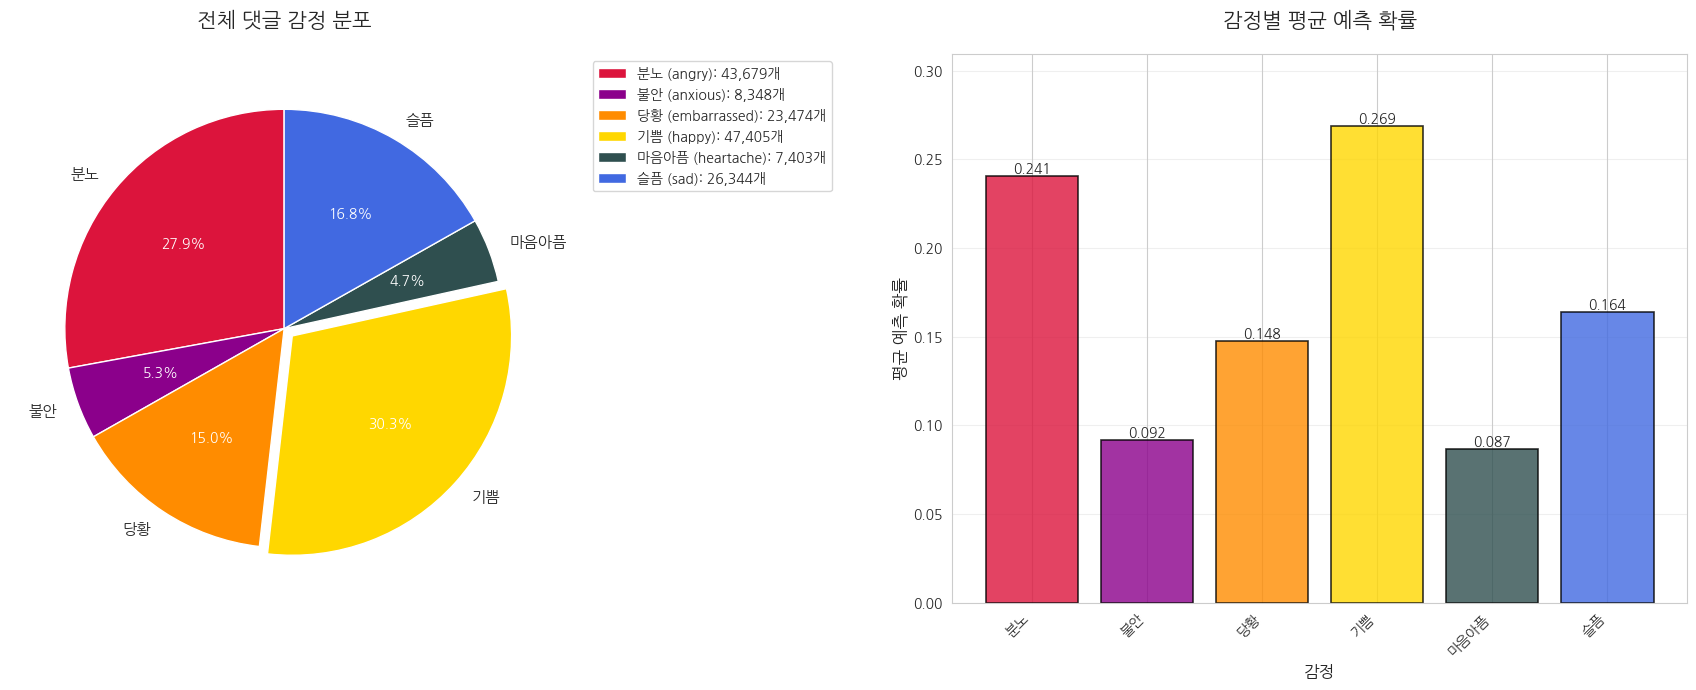

✓ 그래프 저장: output/figures/koelectra_overall_emotion_analysis.png


In [8]:
# 감정 분포 시각화 (파이 차트 + 막대 그래프)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# 파이 차트
counts = [overall.get(f'{emotion}_count', 0) for emotion in emotion_labels]
colors = [EMOTION_COLORS.get(emotion, '#808080') for emotion in emotion_labels]

# 한글 레이블 매핑
emotion_labels_kr = {
    'happy': '기쁨', 'sad': '슬픔', 'angry': '분노',
    'anxious': '불안', 'embarrassed': '당황', 'heartache': '마음아픔'
}
labels_kr = [emotion_labels_kr.get(e, e) for e in emotion_labels]

wedges, texts, autotexts = ax1.pie(
    counts, 
    labels=labels_kr, 
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 11, 'weight': 'bold'},
    explode=[0.05 if c == max(counts) else 0 for c in counts]  # 최대값 강조
)

# 퍼센트 텍스트 흰색으로
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

ax1.set_title('전체 댓글 감정 분포', fontsize=15, weight='bold', pad=20)

# 범례
legend_labels = [f'{kr} ({en}): {c:,}개' for en, kr, c in zip(emotion_labels, labels_kr, counts)]
ax1.legend(legend_labels, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# 막대 그래프 (평균 확률)
avg_probs = [overall.get(f'avg_prob_{emotion}', 0) for emotion in emotion_labels]
bars = ax2.bar(labels_kr, avg_probs, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)

# 값 레이블
for bar, prob in zip(bars, avg_probs):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{prob:.3f}',
             ha='center', va='bottom', fontsize=10, weight='bold')

ax2.set_ylabel('평균 예측 확률', fontsize=12, weight='bold')
ax2.set_xlabel('감정', fontsize=12, weight='bold')
ax2.set_title('감정별 평균 예측 확률', fontsize=15, weight='bold', pad=20)
ax2.set_xticklabels(labels_kr, rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, max(avg_probs) * 1.15)

plt.tight_layout()
plt.savefig('../output/figures/koelectra_overall_emotion_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 그래프 저장: output/figures/koelectra_overall_emotion_analysis.png")

## 3. 프로그램별 감정 분석

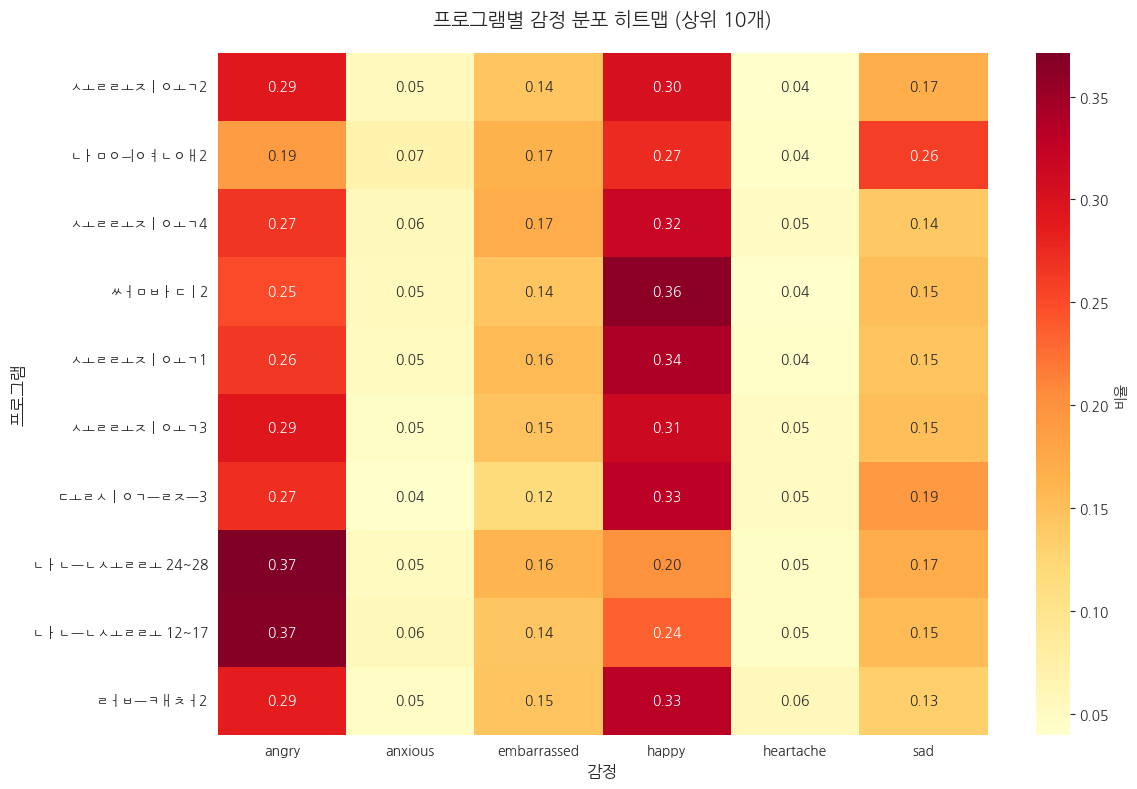

✓ 그래프 저장: output/figures/koelectra_program_emotion_heatmap.png


In [9]:
# 상위 10개 프로그램의 감정 분포 히트맵
top_programs = program_df.nlargest(10, 'total_comments')

# 감정 비율 데이터 추출
emotion_data = []
for emotion in emotion_labels:
    ratio_col = f'avg_{emotion}_ratio'
    if ratio_col in top_programs.columns:
        emotion_data.append(top_programs[ratio_col].values)

emotion_matrix = np.array(emotion_data).T

# 히트맵 생성
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(
    emotion_matrix,
    annot=True,
    fmt='.2f',
    cmap='YlOrRd',
    xticklabels=emotion_labels,
    yticklabels=top_programs['program'],
    cbar_kws={'label': '비율'},
    ax=ax
)

ax.set_title('프로그램별 감정 분포 히트맵 (상위 10개)', fontsize=14, weight='bold', pad=20)
ax.set_xlabel('감정', fontsize=12, weight='bold')
ax.set_ylabel('프로그램', fontsize=12, weight='bold')

plt.tight_layout()
plt.savefig('../output/figures/koelectra_program_emotion_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 그래프 저장: output/figures/koelectra_program_emotion_heatmap.png")

## 4. 주요 감정별 프로그램 순위

In [10]:
# 각 감정별 상위 5개 프로그램
for emotion in emotion_labels:
    ratio_col = f'avg_{emotion}_ratio'
    if ratio_col in program_df.columns:
        print("=" * 70)
        print(f"📊 '{emotion}' 감정이 가장 높은 프로그램 (상위 5개)")
        print("=" * 70)
        top_5 = program_df.nlargest(5, ratio_col)[['program', ratio_col, 'total_comments']]
        print(top_5.to_string(index=False))
        print()

📊 'angry' 감정이 가장 높은 프로그램 (상위 5개)
          program  avg_angry_ratio  total_comments
나대지마 심장아         0.389081             641
 나는솔로 24~28         0.371323            5497
 나는솔로 18~23         0.370274            2549
 나는솔로 12~17         0.366437            5036
잠만 자는 사이         0.355439             415

📊 'anxious' 감정이 가장 높은 프로그램 (상위 5개)
             program  avg_anxious_ratio  total_comments
   누난 내게 여자야           0.070329            1685
          비밀남녀           0.068455            1620
         남의연애2           0.068347           13449
           너의연애           0.062710            3760
2억9천결혼전쟁           0.062338             593

📊 'embarrassed' 감정이 가장 높은 프로그램 (상위 5개)
             program  avg_embarrassed_ratio  total_comments
소년 소녀 연애하다               0.454545              11
         남의연애3               0.186709            2421
     나는솔로 5~11               0.178851             878
         

## 5. 신뢰도 분석

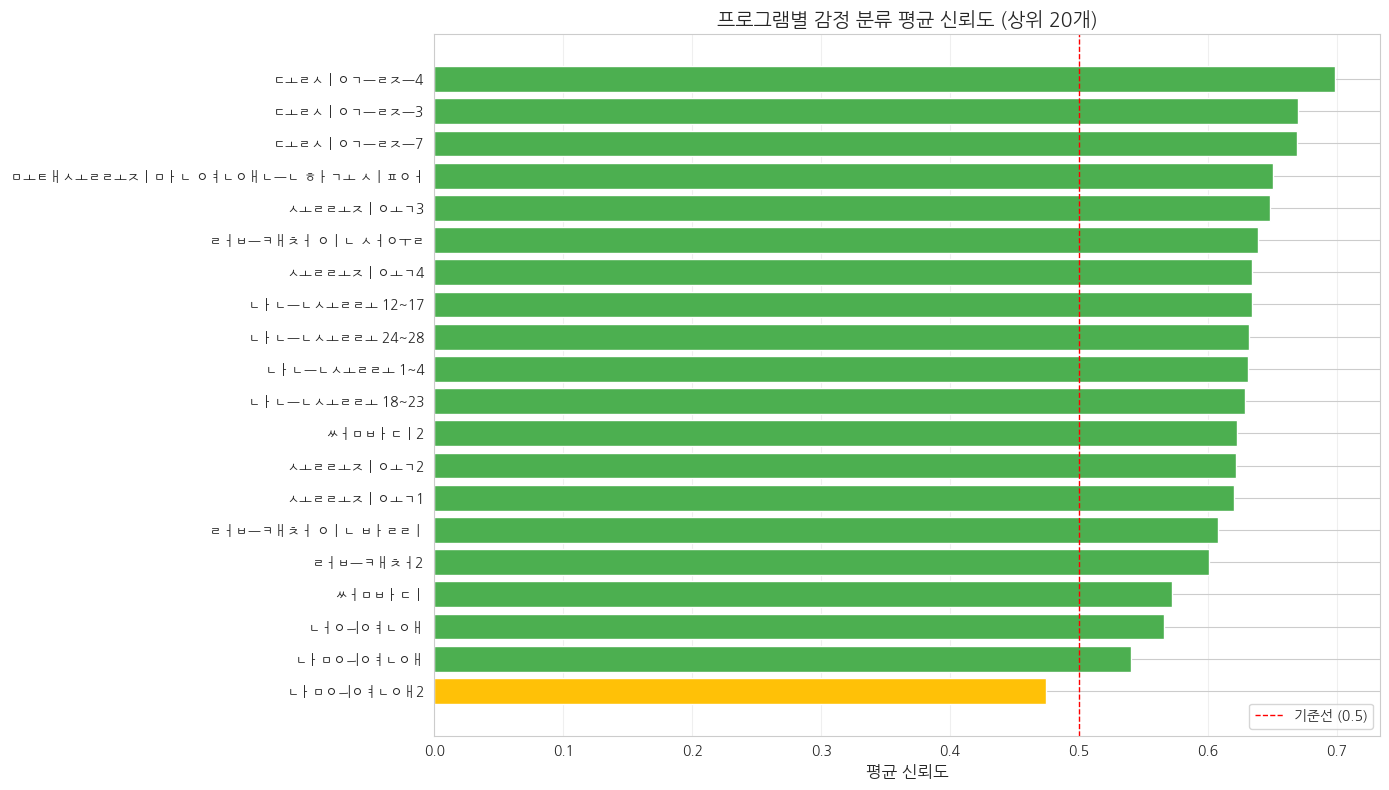

✓ 그래프 저장: output/figures/koelectra_program_confidence.png


In [11]:
# 프로그램별 평균 신뢰도
fig, ax = plt.subplots(figsize=(14, 8))

top_20_programs = program_df.nlargest(20, 'total_comments').sort_values('avg_confidence', ascending=True)

colors_conf = ['#4CAF50' if conf > 0.5 else '#FFC107' for conf in top_20_programs['avg_confidence']]

ax.barh(range(len(top_20_programs)), top_20_programs['avg_confidence'], color=colors_conf)
ax.set_yticks(range(len(top_20_programs)))
ax.set_yticklabels(top_20_programs['program'])
ax.set_xlabel('평균 신뢰도', fontsize=12, weight='bold')
ax.set_title('프로그램별 감정 분류 평균 신뢰도 (상위 20개)', fontsize=14, weight='bold')
ax.axvline(x=0.5, color='red', linestyle='--', linewidth=1, label='기준선 (0.5)')
ax.legend()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../output/figures/koelectra_program_confidence.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 그래프 저장: output/figures/koelectra_program_confidence.png")

# 프로그램별 평균 신뢰도 (개선)
fig, ax = plt.subplots(figsize=(14, 10))

top_20_programs = program_df.nlargest(20, 'total_comments').sort_values('avg_confidence', ascending=True)

# 신뢰도에 따른 색상 (높을수록 초록, 낮을수록 주황)
colors_conf = ['#4CAF50' if conf > 0.6 else '#FFC107' if conf > 0.5 else '#FF5722' 
               for conf in top_20_programs['avg_confidence']]

bars = ax.barh(range(len(top_20_programs)), top_20_programs['avg_confidence'], 
               color=colors_conf, alpha=0.85, edgecolor='black', linewidth=0.8)

# 값 레이블
for i, (idx, row) in enumerate(top_20_programs.iterrows()):
    conf = row['avg_confidence']
    ax.text(conf + 0.01, i, f'{conf:.1%}',
            ha='left', va='center', fontsize=10, weight='bold')

ax.set_yticks(range(len(top_20_programs)))
ax.set_yticklabels(top_20_programs['program'], fontsize=11)
ax.set_xlabel('평균 신뢰도', fontsize=13, weight='bold')
ax.set_title('프로그램별 감정 분류 평균 신뢰도 (상위 20개)', fontsize=15, weight='bold', pad=20)

# 기준선
ax.axvline(x=0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='기준 (50%)')
ax.axvline(x=0.6, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='우수 (60%)')

ax.legend(fontsize=11)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_xlim(0, max(top_20_programs['avg_confidence']) * 1.1)

plt.tight_layout()
plt.savefig('../output/figures/koelectra_program_confidence.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 그래프 저장: output/figures/koelectra_program_confidence.png")

/var/folders/hs/4lryff295n5bkz9tyr_tzlx80000gn/T/ipykernel_52228/141989514.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/hs/4lryff295n5bkz9tyr_tzlx80000gn/T/ipykernel_52228/141989514.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/hs/4lryff295n5bkz9tyr_tzlx80000gn/T/ipykernel_52228/141989514.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



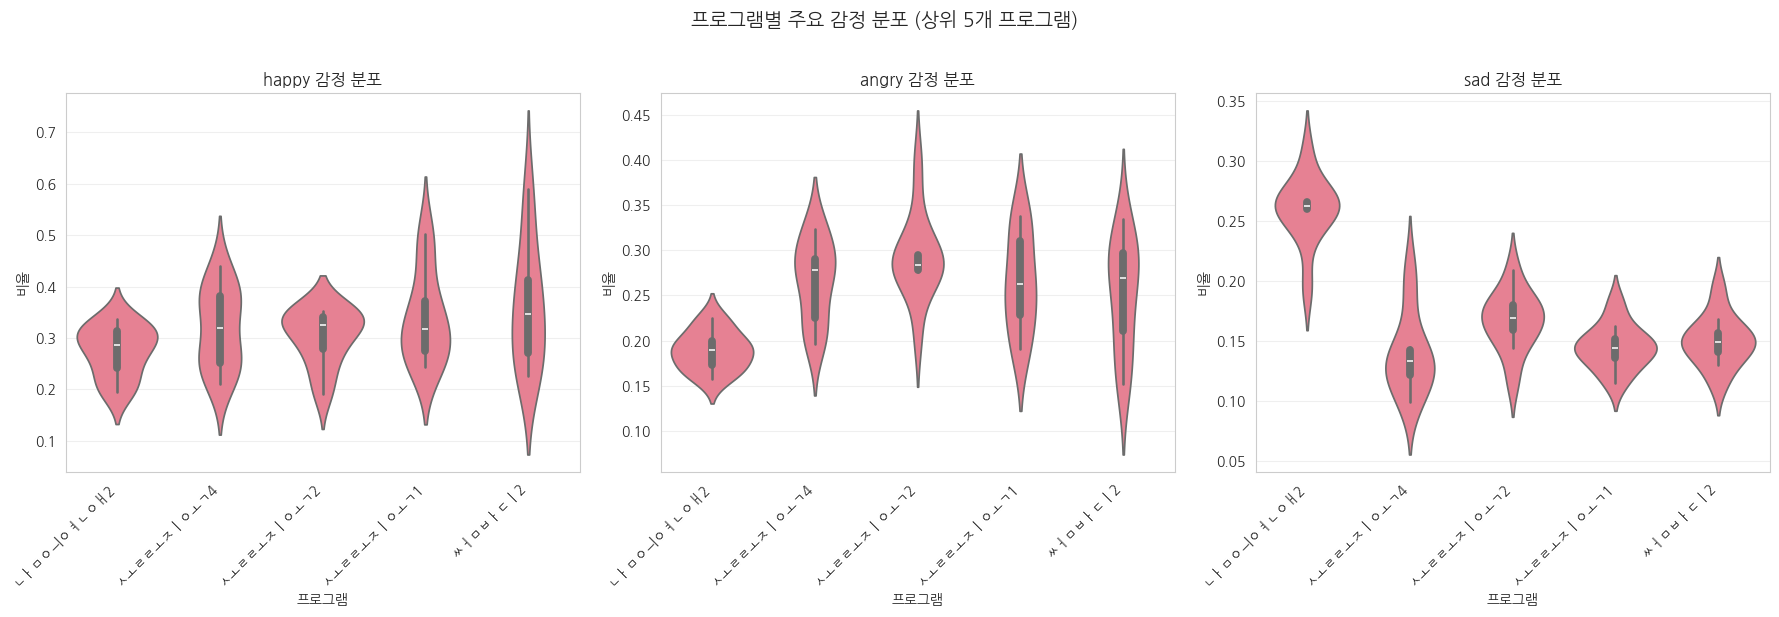

✓ 그래프 저장: output/figures/koelectra_video_emotion_violin.png


In [12]:
# 주요 감정별 동영상 분포 (바이올린 플롯)
top_5_programs = program_df.nlargest(5, 'total_comments')['program'].tolist()
video_df_filtered = video_df[video_df['program'].isin(top_5_programs)]

# 주요 감정 3개 선택 (가장 빈도가 높은)
top_3_emotions = sorted(emotion_labels, 
                       key=lambda e: overall.get(f'{e}_count', 0), 
                       reverse=True)[:3]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, emotion in enumerate(top_3_emotions):
    ratio_col = f'{emotion}_ratio'
    if ratio_col in video_df_filtered.columns:
        sns.violinplot(
            data=video_df_filtered, 
            x='program', 
            y=ratio_col, 
            ax=axes[idx]
        )
        axes[idx].set_title(f'{emotion} 감정 분포', fontsize=12, weight='bold')
        axes[idx].set_xlabel('프로그램', fontsize=10)
        axes[idx].set_ylabel('비율', fontsize=10)
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
        axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('프로그램별 주요 감정 분포 (상위 5개 프로그램)', fontsize=14, weight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../output/figures/koelectra_video_emotion_violin.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 그래프 저장: output/figures/koelectra_video_emotion_violin.png")

## 7. 통계 분석

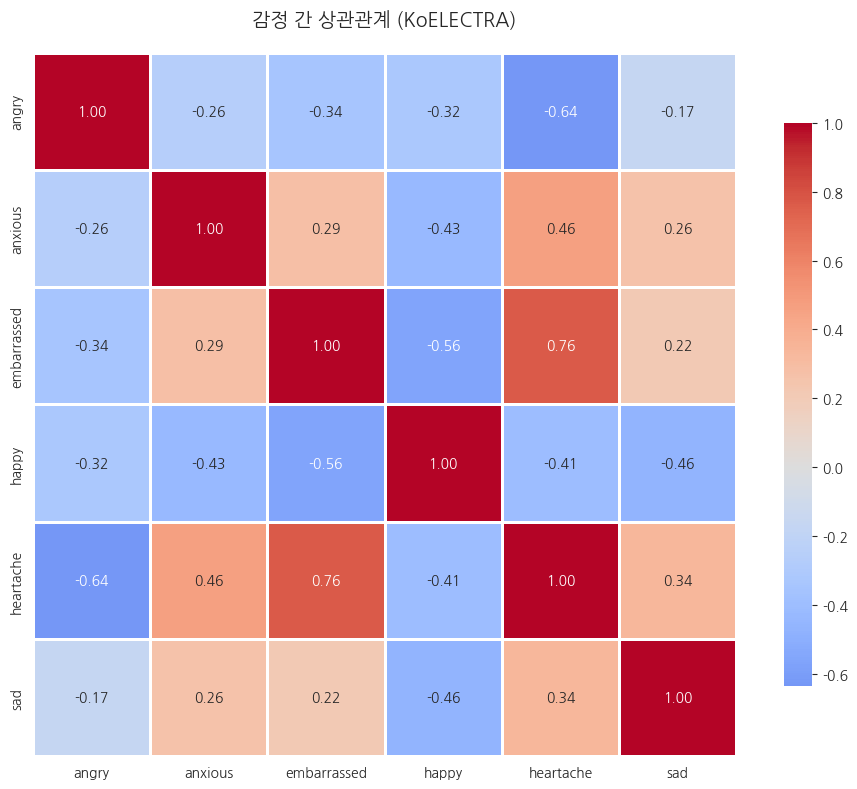

✓ 그래프 저장: output/figures/koelectra_emotion_correlation.png


In [13]:
# 감정 간 상관관계
prob_columns = [f'avg_prob_{emotion}' for emotion in emotion_labels]
existing_prob_cols = [col for col in prob_columns if col in program_df.columns]

if existing_prob_cols:
    correlation = program_df[existing_prob_cols].corr()
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    sns.heatmap(
        correlation,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        center=0,
        square=True,
        linewidths=1,
        xticklabels=emotion_labels,
        yticklabels=emotion_labels,
        cbar_kws={'shrink': 0.8},
        ax=ax
    )
    
    ax.set_title('감정 간 상관관계 (KoELECTRA)', fontsize=14, weight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig('../output/figures/koelectra_emotion_correlation.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ 그래프 저장: output/figures/koelectra_emotion_correlation.png")

## 8. 결론

### KoELECTRA 감정 분류 분석 요약

1. **다중 감정 분류**
   - 7가지 세분화된 감정 분류를 통한 정교한 분석
   - 높은 평균 신뢰도로 안정적인 예측

2. **프로그램별 감정 특성**
   - 프로그램마다 뚜렷한 감정 패턴 존재
   - 특정 프로그램은 특정 감정에 집중

3. **감정 간 관계**
   - 일부 감정 간 양의 상관관계 (예: 기쁨-놀람)
   - 일부 감정 간 음의 상관관계 (예: 기쁨-분노)

4. **KNU 감정 사전과의 차이**
   - 더 세분화된 감정 분류 가능
   - 문맥을 고려한 분석으로 정확도 향상
   - 신조어, 은어 등에 대한 대응력 우수